### 1. Understanding Current Working Directory
-Check you wotking directory

-Always verify your working directory at the start

-Set up proper project structure from the beginning

project/

├── notebooks/

│   └── analysis.ipynb

├── data/

│   ├── raw/

│   └── processed/

├── src/

│   └── utils.py

└── config/


In [15]:
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List files in current directory
print("Files in current directory:", os.listdir('.'))

Current Working Directory: c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning
Files in current directory: ['.venv', 'adult-census.csv', 'Decision Trees and Random Forest Project .ipynb', 'Decision Trees.ipynb', 'decision_tree_regression.py', 'drug200.csv', 'e2e_MachineLearning', 'ensemble_random_forest.ipynb', 'factor_analysis.ipynb', 'ffib.ipynb', 'fiib1.ipynb', 'fiib3.ipynb', 'Housing.csv', 'iris.csv', 'LDA.ipynb', 'lda.py', 'logistics.csv', 'MLP_22.10.ipynb', 'MLP_23.10.ipynb', 'penguins_regression.csv', 'pivottablejs.html', 'Position_Salaries.csv', 'requirement.txt', 'ShopSellData.csv', 'StoreSalesData.csv', 'tennis.csv', 'tranfromed_data.csv', 'trees_regression.ipynb', 'Wine.csv', 'wokshop.ipynb', 'Workshop']


### 2. Change working Directory

In [16]:
import os
"""
# Change to specific directory
os.chdir('/path/to/your/desired/directory')- write your path of the directory

# Change to parent directory
os.chdir('..')

# Change to subdirectory
os.chdir('data')
"""

"\n# Change to specific directory\nos.chdir('/path/to/your/desired/directory')- write your path of the directory\n\n# Change to parent directory\nos.chdir('..')\n\n# Change to subdirectory\nos.chdir('data')\n"

### 3. Import Required Modules/Packages

#### Best Practices 
1. Always use virtual environments

2. Pin major versions in production

3. Use requirements.txt with version constraints

4. Test compatibility before major upgrades

5. Keep GPU drivers and CUDA toolkit updated

6. Use dependency resolution tools (pip-tools, poetry)

7. Document known compatibility issues

8. Use try-except blocks for optional dependencies

9. Regularly update security patches

10. Maintain separate environments for different projects

In [17]:
# for handling data and dataframe
import pandas as pd
import numpy as np
# Graphical representation of the data
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing modules
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
# Machine Learning modules
# data split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Model output metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [ ]:
# read data
data = pd.read_csv('Datasets/Housing.csv')

In [19]:
# check for few row items
data.head()
data.tail()


price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
541   91500     4800         3        2        4      yes     yes       no   
542   94000     6000         3        2        4      yes      no       no   
543  103000     6000         3        2        4      yes     yes       no   
544  105000     6000         3        2        2      yes     yes       no   
545  105000     6000         3        1        2      yes      no       no   

    gashw airco  garagepl prefarea  
541    no   yes         0       no  
542    no   yes         0       no  
543    no   yes         1       no  
544    no   yes         1       no  
545    no   yes         1       no

In [20]:
# drop unwanted columns
#data= data.drop('rownames', axis=1)
#data

In [21]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [22]:
# check missing values
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [23]:
# check data statistics
data.describe()

price       lotsize    bedrooms     bathrms     stories  \
count     546.000000    546.000000  546.000000  546.000000  546.000000   
mean    68121.597070   5150.265568    2.965201    1.285714    1.807692   
std     26702.670926   2168.158725    0.737388    0.502158    0.868203   
min     25000.000000   1650.000000    1.000000    1.000000    1.000000   
25%     49125.000000   3600.000000    2.000000    1.000000    1.000000   
50%     62000.000000   4600.000000    3.000000    1.000000    2.000000   
75%     82000.000000   6360.000000    3.000000    2.000000    2.000000   
max    190000.000000  16200.000000    6.000000    4.000000    4.000000   

         garagepl  
count  546.000000  
mean     0.692308  
std      0.861307  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

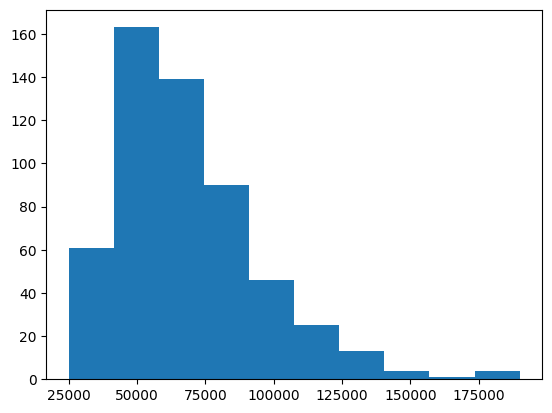

In [24]:
# check Target Distribution
plt.hist(data['price'])
plt.show()

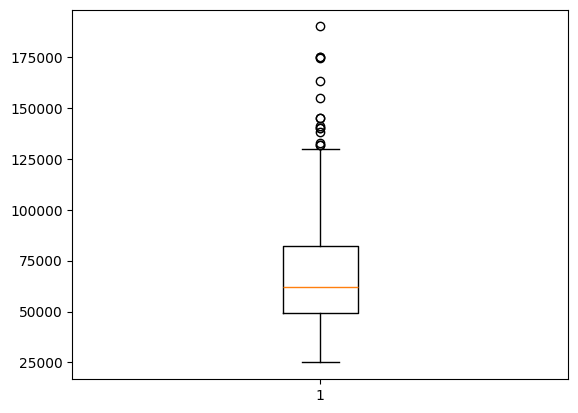

In [25]:
# check for outliers
plt.boxplot(data['price'])
plt.show()

In [26]:
# data preprocessing
lb = LabelBinarizer()
le = LabelEncoder()
ohe = OneHotEncoder() 


In [27]:
#Check for unique items in catgorical variable
unique= {col:data[col].unique() for col in data.columns}
unique_df= pd.DataFrame(list(unique.items()))
unique_df

0                                                  1
0      price  [42000, 38500, 49500, 60500, 61000, 66000, 690...
1    lotsize  [5850, 4000, 3060, 6650, 6360, 4160, 3880, 480...
2   bedrooms                                 [3, 2, 4, 1, 5, 6]
3    bathrms                                       [1, 2, 3, 4]
4    stories                                       [2, 1, 3, 4]
5   driveway                                          [yes, no]
6    recroom                                          [no, yes]
7   fullbase                                          [yes, no]
8      gashw                                          [no, yes]
9      airco                                          [no, yes]
10  garagepl                                       [1, 0, 2, 3]
11  prefarea                                          [no, yes]

In [28]:
# check data columns name
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [29]:
# transform categorical data
data['driveway']= lb.fit_transform(data['driveway'])
data['recroom'] = le.fit_transform(data['recroom'])

In [30]:
# transform categorical data via loop
le_columns= ['fullbase', 'gashw', 'airco',  'prefarea']
for col in le_columns:
    data[col]= le.fit_transform(data[col])

In [32]:
# transform stories variable via OneHotEncoding 
onehotencoding = ohe.fit_transform(data[['stories']]).toarray()
onehotencoding= pd.DataFrame(onehotencoding)
onehotencoding = onehotencoding.rename(columns={0: 'stories_1', 1: 'storeis_2', 2: 'stories_3', 3: 'stories_4'})

In [33]:
# join with original daat
data = data.join(onehotencoding)
data.head()

price  lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  \
0  42000     5850         3        1        2         1        0         1   
1  38500     4000         2        1        1         1        0         0   
2  49500     3060         3        1        1         1        0         0   
3  60500     6650         3        1        2         1        1         0   
4  61000     6360         2        1        1         1        0         0   

   gashw  airco  garagepl  prefarea  stories_1  storeis_2  stories_3  \
0      0      0         1         0        0.0        1.0        0.0   
1      0      0         0         0        1.0        0.0        0.0   
2      0      0         0         0        1.0        0.0        0.0   
3      0      0         0         0        0.0        1.0        0.0   
4      0      0         0         0        1.0        0.0        0.0   

   stories_4  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [ ]:
# drop unwated column
data.drop('stories', axis=1, inplace= True)

In [36]:
# check for outlier
Q1= np.percentile(data['price'], 25)
print(Q1)
Q3= np.percentile(data['price'], 75)
print(Q3)
IQR= Q3-Q1
print(IQR)
upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR
print(upper_limit, lower_limit)
upper_arrary= np.where(data['price']>= upper_limit)
print(upper_arrary)
print(data['price'][92])



49125.0
82000.0
32875.0
131312.5 -187.5
(array([ 92, 103, 216, 331, 337, 338, 361, 362, 368, 375, 376, 377, 382,
       418, 436], dtype=int64),)
163000


In [42]:
# Take out Y
y= data['price']
print(y)
# Take out X's
X= data.loc[:, data.columns != 'price']
print(X.head())

0       42000
1       38500
2       49500
3       60500
4       61000
        ...  
541     91500
542     94000
543    103000
544    105000
545    105000
Name: price, Length: 546, dtype: int64
   lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  gashw  \
0     5850         3        1        2         1        0         1      0   
1     4000         2        1        1         1        0         0      0   
2     3060         3        1        1         1        0         0      0   
3     6650         3        1        2         1        1         0      0   
4     6360         2        1        1         1        0         0      0   

   airco  garagepl  prefarea  stories_1  storeis_2  stories_3  stories_4  
0      0         1         0        0.0        1.0        0.0        0.0  
1      0         0         0        1.0        0.0        0.0        0.0  
2      0         0         0        1.0        0.0        0.0        0.0  
3      0         0         0        0.

In [44]:
# check for correlation
corr= X.corr()
print(corr)

            lotsize  bedrooms   bathrms   stories  driveway   recroom  \
lotsize    1.000000  0.151851  0.193833  0.083675  0.288778  0.140327   
bedrooms   0.151851  1.000000  0.373769  0.407974 -0.011996  0.080492   
bathrms    0.193833  0.373769  1.000000  0.324066  0.041955  0.126892   
stories    0.083675  0.407974  0.324066  1.000000  0.122499  0.042281   
driveway   0.288778 -0.011996  0.041955  0.122499  1.000000  0.091959   
recroom    0.140327  0.080492  0.126892  0.042281  0.091959  1.000000   
fullbase   0.047487  0.097201  0.102791 -0.173860  0.043428  0.372434   
gashw     -0.009201  0.046028  0.067365  0.018261 -0.011942 -0.010119   
airco      0.221765  0.160412  0.184955  0.296216  0.106290  0.136626   
garagepl   0.352872  0.139117  0.178178  0.043412  0.203682  0.038122   
prefarea   0.234782  0.078953  0.064013  0.042940  0.199378  0.161292   
stories_1  0.054348 -0.509974 -0.250784 -0.785490 -0.053249 -0.022632   
storeis_2 -0.159612  0.377424  0.080982  0.194889 -

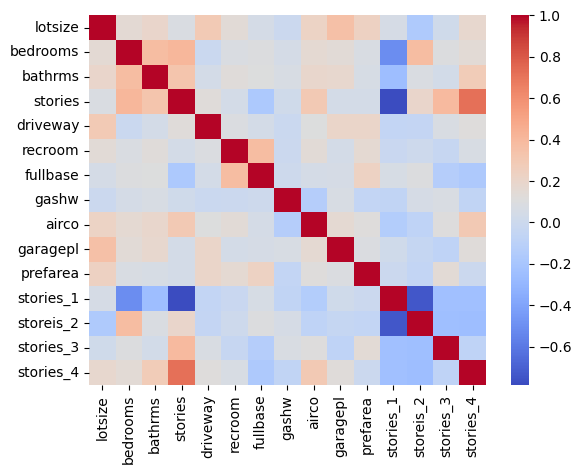

In [47]:
# visulaize correlation
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#check for multicollinearity
vif_dataframe = pd.DataFrame()
vif_dataframe['features'] = X.columns
vif_dataframe['vif']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_dataframe)

     features       vif
0     lotsize  1.370474
1    bedrooms  1.578327
2     bathrms  1.298778
3     stories       inf
4    driveway  1.164881
5     recroom  1.214862
6    fullbase  1.336911
7       gashw  1.053079
8       airco  1.219582
9    garagepl  1.218833
10   prefarea  1.181239
11  stories_1       inf
12  storeis_2       inf
13  stories_3       inf
14  stories_4       inf


c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, random_state=1) 

In [53]:
# Filt model
lm= sm.OLS(y_train, X_train).fit()

In [54]:
# print model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     70.62
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           3.77e-97
Time:                        12:50:13   Log-Likelihood:                -4808.6
No. Observations:                 436   AIC:                             9645.
Df Residuals:                     422   BIC:                             9702.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        3.0899      0.406      7.602      0.0

In [55]:
# make prediction
y_train_pred = lm.predict(X_train)
print(y_train_pred)

273     65930.925741
40      53747.818351
397     97326.015708
339     48952.987122
411    104397.285813
           ...      
129     91232.406585
144     60353.206486
72      32631.970767
235     49660.541092
37      80046.734745
Length: 436, dtype: float64


In [61]:
# check for metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae= mean_absolute_error(y_train, y_train_pred)
print ('MAE', mae)
rmse= np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE', rmse)
r_2= r2_score(y_train, y_train_pred)
print('R_squared', r_2)

MAE 11194.812606491
RMSE 14913.171921672718
R_squared 0.6851026834699139


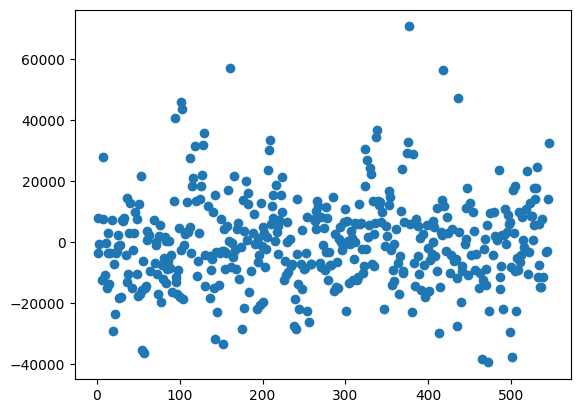

In [62]:
# check for Volatility
plt.plot(lm.resid, 'o')
plt.show()

c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\reg

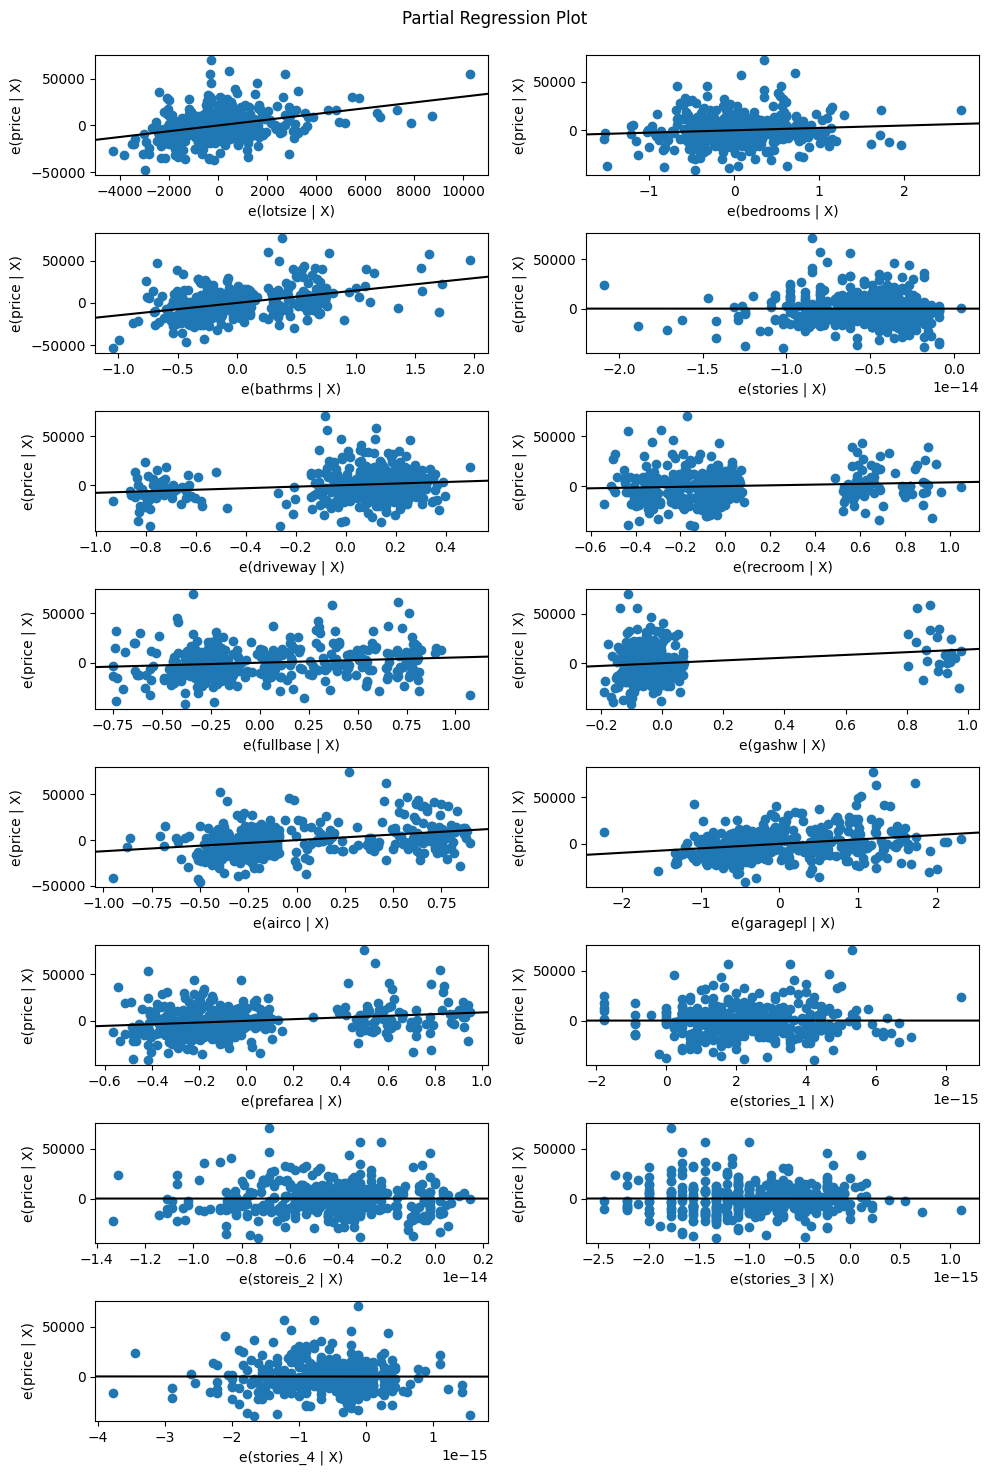

In [ ]:
# check for linearity
fig= plt.figure(figsize=(10,15))
fig= sm.graphics.plot_partregress_grid(lm, fig=fig)
plt.show()